COSC 4337 Project
Group 2
Member Names: Muhammad Raza, 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'smoking_health_data_final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [2]:
# Preprocessing the data

# Fill missing values in 'cigs_per_day' with 0
data['cigs_per_day'].fillna(0, inplace=True)

# Split 'blood_pressure' into systolic and diastolic
data[['systolic_bp', 'diastolic_bp']] = data['blood_pressure'].str.split('/', expand=True)
data['systolic_bp'] = pd.to_numeric(data['systolic_bp'])
data['diastolic_bp'] = pd.to_numeric(data['diastolic_bp'])

# Drop original 'blood_pressure' column
data.drop('blood_pressure', axis=1, inplace=True)

# Fill missing cholesterol values with the mean
data['chol'].fillna(data['chol'].mean(), inplace=True)

# Encode categorical data: 'sex' and 'current_smoker'
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['current_smoker'] = data['current_smoker'].map({'yes': 1, 'no': 0})


In [3]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['current_smoker'])
y = data['current_smoker']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

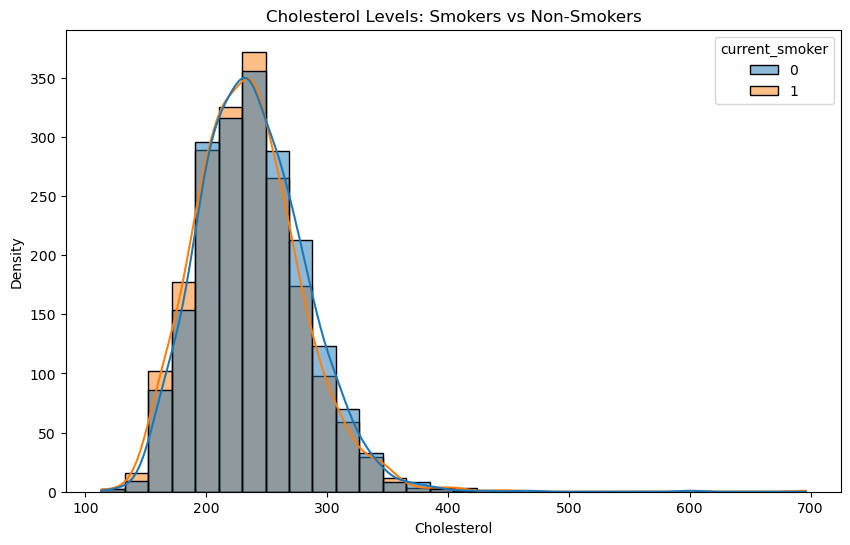

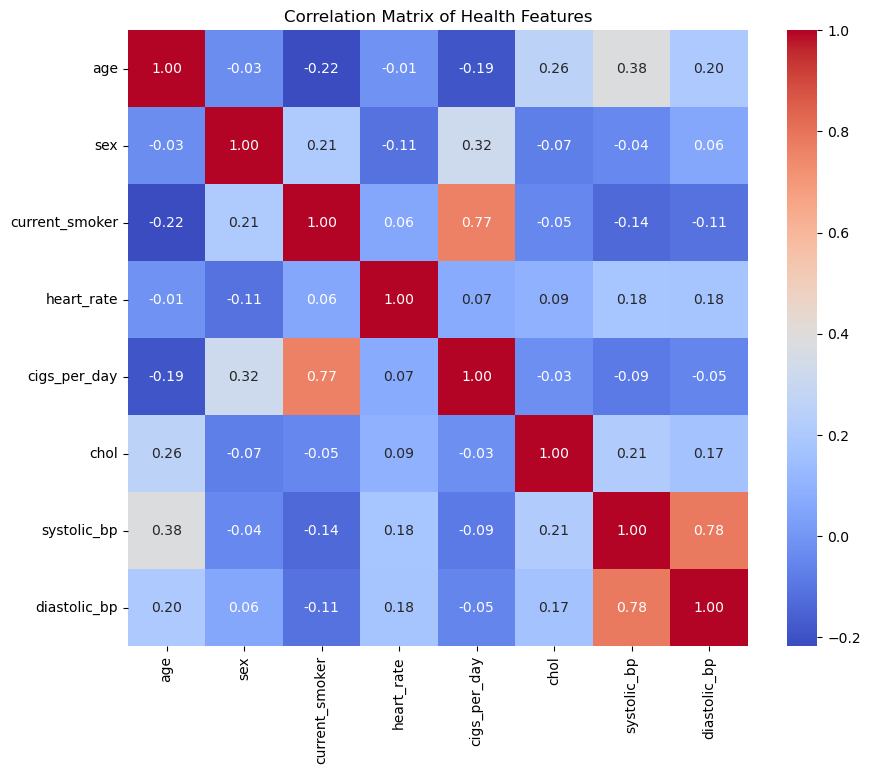

In [5]:
# Visualize cholesterol distribution by smoker status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='chol', hue='current_smoker', kde=True, bins=30)
plt.title('Cholesterol Levels: Smokers vs Non-Smokers')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Health Features')
plt.show()

In [6]:
# Build the MLPClassifier (Neural Network) using Scikit-learn
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9949
